# Lekce10 

In [5]:
import pandas
import requests
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC

r = requests.get(
    "https://raw.githubusercontent.com/lutydlitatova/czechitas-datasets/main/datasets/soybean-1-spot.csv"
)
open("soybean-1-spot.csv", "wb").write(r.content)

r = requests.get(
    "https://raw.githubusercontent.com/lutydlitatova/czechitas-datasets/main/datasets/soybean-2-rot.csv"
)
open("soybean-2-rot.csv", "wb").write(r.content)

data

,leaf-shread,stem,lodging,stem-cankers,fruiting-bodies,external-decay,fruit-pods,fruit-spots,seed,seed-discolor,seed-size,shriveling,class
0,absent,norm,yes,absent,absent,absent,norm,absent,norm,absent,norm,absent,brown-spot
1,absent,norm,yes,absent,absent,absent,norm,absent,norm,absent,norm,absent,brown-spot
2,present,norm,yes,absent,absent,absent,norm,absent,norm,absent,norm,absent,brown-spot
3,present,norm,yes,absent,absent,absent,norm,absent,norm,absent,norm,absent,brown-spot
4,absent,norm,yes,absent,absent,absent,norm,absent,norm,absent,norm,absent,brown-spot
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,absent,abnorm,yes,above-sec-nde,absent,firm-and-dry,diseased,colored,norm,absent,norm,absent,frog-eye-leaf-spot
270,absent,abnorm,yes,above-sec-nde,absent,firm-and-dry,diseased,colored,norm,absent,norm,absent,frog-eye-leaf-spot
271,absent,abnorm,yes,above-sec-nde,absent,firm-and-dry,diseased,colored,norm,absent,norm,absent,frog-eye-leaf-spot
272,absent,abnorm,yes,above-sec-nde,absent,firm-and-dry,diseased,colored,norm,absent,norm,absent,frog-eye-leaf-spot


1. Určení x a y (vstupní X a výstupní y)

In [4]:
X = data.drop(columns=["class"])
y = data["class"]
y.value_counts()

brown-spot             92
alternarialeaf-spot    91
frog-eye-leaf-spot     91
Name: class, dtype: int64

2. Kategorické proměnné, v tomto případě všechny, musíme převést na číselné, pomocí metody one-hot (angl. one-hot encoding).

In [6]:
encoder = OneHotEncoder()
X = encoder.fit_transform(X)

pandas.DataFrame(X.toarray(), columns=encoder.get_feature_names_out()).head()

,leaf-shread_absent,leaf-shread_present,stem_abnorm,stem_norm,lodging_no,lodging_yes,stem-cankers_above-sec-nde,stem-cankers_above-soil,stem-cankers_absent,fruiting-bodies_absent,...,fruit-spots_brown-w/blk-specks,fruit-spots_colored,seed_abnorm,seed_norm,seed-discolor_absent,seed-discolor_present,seed-size_lt-norm,seed-size_norm,shriveling_absent,shriveling_present
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


Třídy převedeme na celočíselnou reprezentaci

In [7]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Rozdělíme data na trénovací a testovací sadu.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

vyhodnocujeme klasifikaci

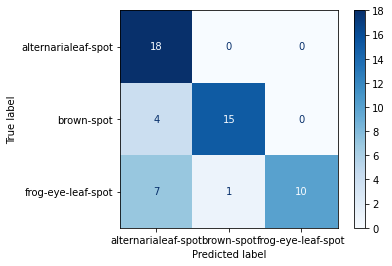

In [13]:
confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=encoder.classes_,
    cmap=plt.cm.Blues,
)

In [14]:
print(round(accuracy_score(y_test, y_pred), 3))
print(round(f1_score(y_test, y_pred, average="weighted"), 3))

0.782
0.781


Upravení více parametrů: Grid search

In [20]:
model_1 = KNeighborsClassifier()
params_1 = {"n_neighbors": [1, 5, 7, 11, 13]}

clf_1 = GridSearchCV(model_1, params_1, scoring="f1_weighted")
clf_1.fit(X_train, y_train)

print(clf_1.best_params_)
print(clf_1.best_score_)

{'n_neighbors': 11}
0.7729201189525968


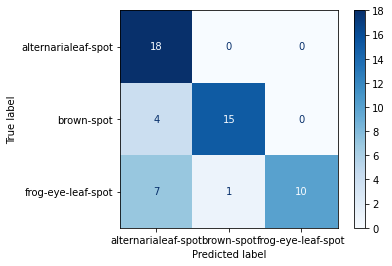

In [21]:
confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=encoder.classes_,
    cmap=plt.cm.Blues,
)